### Experiment Tracking using MLFlow

In [2]:
import pandas as pd
import numpy as np

In [3]:
train_df = pd.read_csv('data.csv')
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP002529,Male,Yes,2,Graduate,No,6700,1750.0,230.0,300.0,1.0,Semiurban,Y
1,LP001385,Male,No,0,Graduate,No,5316,0.0,136.0,360.0,1.0,Urban,Y
2,LP001926,Male,Yes,0,Graduate,No,3704,2000.0,120.0,360.0,1.0,Rural,Y
3,LP001144,Male,Yes,0,Graduate,No,5821,0.0,144.0,360.0,1.0,Urban,Y
4,LP002562,Male,Yes,1,Not Graduate,No,5333,1131.0,186.0,360.0,NaN,Urban,Y


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430 entries, 0 to 429
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            430 non-null    object 
 1   Gender             420 non-null    object 
 2   Married            427 non-null    object 
 3   Dependents         416 non-null    object 
 4   Education          430 non-null    object 
 5   Self_Employed      410 non-null    object 
 6   ApplicantIncome    430 non-null    int64  
 7   CoapplicantIncome  430 non-null    float64
 8   LoanAmount         414 non-null    float64
 9   Loan_Amount_Term   422 non-null    float64
 10  Credit_History     394 non-null    float64
 11  Property_Area      430 non-null    object 
 12  Loan_Status        430 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 43.8+ KB


### Binary Encoding of Categorical Variables

In [5]:
train_df['Gender']= train_df['Gender'].map({'Male':0, 'Female':1})
train_df['Married']= train_df['Married'].map({'No':0, 'Yes':1})
train_df['Loan_Status']= train_df['Loan_Status'].map({'N':0, 'Y':1})

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430 entries, 0 to 429
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            430 non-null    object 
 1   Gender             420 non-null    float64
 2   Married            427 non-null    float64
 3   Dependents         416 non-null    object 
 4   Education          430 non-null    object 
 5   Self_Employed      410 non-null    object 
 6   ApplicantIncome    430 non-null    int64  
 7   CoapplicantIncome  430 non-null    float64
 8   LoanAmount         414 non-null    float64
 9   Loan_Amount_Term   422 non-null    float64
 10  Credit_History     394 non-null    float64
 11  Property_Area      430 non-null    object 
 12  Loan_Status        430 non-null    int64  
dtypes: float64(6), int64(2), object(5)
memory usage: 43.8+ KB


### Checking for missing values

In [8]:
train_df.isnull().sum()

Loan_ID               0
Gender               10
Married               3
Dependents           14
Education             0
Self_Employed        20
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           16
Loan_Amount_Term      8
Credit_History       36
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
## dropping all the missing values
train_df = train_df.dropna()
train_df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### Segregating the target variable from the features

In [10]:
X = train_df[['Gender', 'Married', 'ApplicantIncome', 'LoanAmount', 'Credit_History']]
y = train_df.Loan_Status
X.shape, y.shape

((335, 5), (335,))

### Splitting the data

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=5)

### Model Training

In [12]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(max_depth=4, random_state=5)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, random_state=5)

### Cross validation

In [13]:
from sklearn.metrics import accuracy_score

pred_val = model.predict(X_val)
accuracy_score(y_val, pred_val)

0.7313432835820896

In [14]:
pred_train = model.predict(X_train)
accuracy_score(y_train, pred_train)

0.8134328358208955

### Tracking using MLFlow

In [22]:
import mlflow
import os

In [23]:
mlflow.set_experiment('loan_status')

<Experiment: artifact_location='file:///Volumes/E-Study/Github/MLFlow-loan-app/mlruns/322603285694720147', creation_time=1678194416980, experiment_id='322603285694720147', last_update_time=1678194416980, lifecycle_stage='active', name='loan_status', tags={}>

In [25]:
with mlflow.start_run():
    ##training the model
    model_rf = RandomForestClassifier(max_depth=4, random_state=5)
    model_rf.fit(X_train, y_train)

    ##capture the validation accuracy
    pred_val = model_rf.predict(X_val)
    val_acc = accuracy_score(y_val, pred_val)

    ##capture the training accuracy
    pred_train = model_rf.predict(X_train)
    train_acc = accuracy_score(y_train, pred_train)

    mlflow.set_tag('mlflow.runName', 'first_run')
    mlflow.log_param('max_depth', 4)
    mlflow.log_metric('val_acc', val_acc)
    mlflow.log_metric('train_acc', train_acc)

    mlflow.sklearn.log_model(model_rf, 'model')

/Users/swapnilmac/opt/anaconda3/lib/python3.9/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


### Hyperparameter Tuning with MLFlow

In [30]:
def track_exp(n_est, max_depth, i):
    with mlflow.start_run():
        ##training the model
        model_rf = RandomForestClassifier(
                                            n_estimators=n_est,
                                            max_depth=max_depth,
                                            random_state=5
                                        )
        model_rf.fit(X_train, y_train)

        ##capture the validation accuracy
        pred_val = model_rf.predict(X_val)
        val_acc = accuracy_score(y_val, pred_val)

        ##capture the training accuracy
        pred_train = model_rf.predict(X_train)
        train_acc = accuracy_score(y_train, pred_train)

        run_name = f"Hyperparameter Tuning_{i}"

        mlflow.set_tag('mlflow.runName', run_name)
        mlflow.log_param('n_estimators', n_est)
        mlflow.log_param('max_depth', max_depth)
        mlflow.log_metric('val_acc', val_acc)
        mlflow.log_metric('train_acc', train_acc)

        mlflow.sklearn.log_model(model_rf, 'model')

In [31]:
track_exp(10, 2, 1)
track_exp(20, 2, 2)
track_exp(30, 2, 3)
track_exp(40, 2, 4)
track_exp(10, 4, 5)
track_exp(20, 4, 6)
track_exp(30, 4, 7)
track_exp(40, 4, 8)
track_exp(10, 8, 9)
track_exp(20, 8, 10)
track_exp(30, 8, 11)
track_exp(40, 8, 12)

### Trying a different model - KNN

In [32]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

/Users/swapnilmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/swapnilmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will n

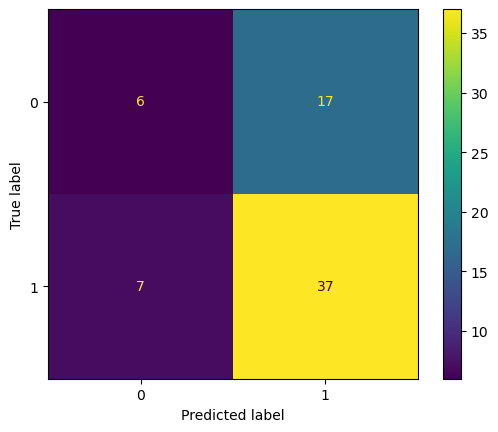

In [33]:
with mlflow.start_run():
    ##training the model
    knn_model = KNeighborsClassifier(n_neighbors=5)
    knn_model.fit(X_train, y_train)

    ##Capture the validation accuracy
    pred_val = knn_model.predict(X_val)
    val_acc = accuracy_score(y_val, pred_val)

    ##capture the training accuracy
    pred_train = knn_model.predict(X_train)
    train_acc = accuracy_score(y_train, pred_train)

    mlflow.set_tag('mlflow.runName', 'knn')
    mlflow.log_param('n_neighbors', 5)
    mlflow.log_metric('val_acc', val_acc)
    mlflow.log_metric('train_acc', train_acc)

    cm = ConfusionMatrixDisplay.from_predictions(y_val, pred_val)
    cm.figure_.savefig('confusion_mat.png')
    mlflow.log_artifact('confusion_mat.png')

    mlflow.sklearn.log_model(knn_model, 'model')